In [1]:
#!pip install --upgrade tensorflow-gpu==2.0.0 #beta1

# Prueba con 1 Dimensión

In [445]:
import os

import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from IPython import display
import pylab as pl
import warnings
import numpy as np
import pandas as pd

In [425]:
warnings.filterwarnings('ignore')

In [426]:
def sample_dataset(dataset_shape = (2000, 1)):
    return tf.random.normal(
        mean=10.0, shape=dataset_shape, stddev=0.1, dtype=tf.float32
    )

In [427]:
def get_noise_vector():
    noise_vector = tf.random.normal(
                mean=0, stddev=1, shape=(real_data.shape[0], latent_space_shape[0])
            )
    return noise_vector

In [428]:
def build_generator(input_shape):
    inputs = tf.keras.layers.Input(input_shape)
    net = tf.keras.layers.Dense(units=64, activation=tf.nn.elu, name='fc1')(inputs)
    net = tf.keras.layers.Dense(units=64, activation=tf.nn.elu, name='fc2')(net)
    net = tf.keras.layers.Dense(units=1, name='G')(net)
    G = tf.keras.Model(inputs=inputs, outputs=net)
    return G

def build_discriminator(input_shape):
    inputs = tf.keras.layers.Input(input_shape)
    net = tf.keras.layers.Dense(units=32, activation=tf.nn.elu, name='fc1')(inputs)
    net = tf.keras.layers.Dense(units=1, name='D')(net)
    D = tf.keras.Model(inputs=inputs, outputs=net)
    return D 

In [429]:
input_shape = (1,)
D = build_discriminator(input_shape)

# noise
latent_space_shape = (100,)
G = build_generator(latent_space_shape)

In [430]:
G.summary()

Model: "model_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_38 (InputLayer)       [(None, 100)]             0         
                                                                 
 fc1 (Dense)                 (None, 64)                6464      
                                                                 
 fc2 (Dense)                 (None, 64)                4160      
                                                                 
 G (Dense)                   (None, 1)                 65        
                                                                 
Total params: 10,689
Trainable params: 10,689
Non-trainable params: 0
_________________________________________________________________


In [431]:
def d_loss(real_output, generated_output):
    '''Discriminator Loss Function'''
    bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    d_loss = bce(tf.ones_like(real_output), real_output)\
            + bce(tf.zeros_like(generated_output), generated_output)
    return d_loss

def g_loss(generated_output):
    '''Generator Loss Function'''
    bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    g_loss = bce(tf.ones_like(generated_output), generated_output)
    return g_loss

In [432]:
if not os.path.exists('./gif/'):
    os.makedirs('./gif/')

G loss:  0.69067824  D loss:  1.2288632  step:  0


KeyboardInterrupt: 

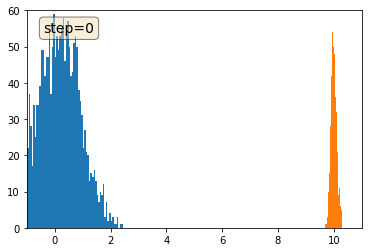

In [433]:
# Let's play the min-max game
def train():
    # Define the optimizers and the train operations
    optimizer = tf.keras.optimizers.Adam(1e-3)

    @tf.function
    def train_step():
        with tf.GradientTape(persistent=True) as tape:
            real_data = sample_dataset()
            noise_vector = tf.random.normal(
                mean=0, stddev=1, shape=(real_data.shape[0], latent_space_shape[0])
            )
            # Sample from the Generator
            fake_data = G(noise_vector)
            # Compute the D loss
            d_fake_data = D(fake_data)
            d_real_data = D(real_data)
            d_loss_value = d_loss(generated_output=d_fake_data, real_output=d_real_data)
            # Compute the G loss
            g_loss_value = g_loss(generated_output=d_fake_data)
        # Now that we have computed the losses, we can compute the gradients 
        # (using the tape) and optimize the networks
        d_gradients = tape.gradient(d_loss_value, D.trainable_variables)
        g_gradients = tape.gradient(g_loss_value, G.trainable_variables)
        del tape

        # Apply gradients to variables
        optimizer.apply_gradients(zip(d_gradients, D.trainable_variables))
        optimizer.apply_gradients(zip(g_gradients, G.trainable_variables))
        return real_data, fake_data, g_loss_value, d_loss_value

    # 40000 training steps with logging every 200 steps
    fig, ax = plt.subplots()
    
#    gloss_list = []
#    dloss_list = []
    
    for step in range(40000):
        real_data, fake_data, g_loss_value, d_loss_value = train_step()
        
#        gloss_list.append(g_loss_value.numpy())
#        dloss_list.append(d_loss_value.numpy())
        
#        print(gloss_list)
        
        if step % 200 == 0:
            print(
                "G loss: ",
                g_loss_value.numpy(),
                " D loss: ",
                d_loss_value.numpy(),
                " step: ",
                step,
            )

            # Sample 5000 values from the Generator and draw the histogram
            ax.hist(fake_data.numpy(), 100)
            ax.hist(real_data.numpy(), 100)
            # these are matplotlib.patch.Patch properties
            props = dict(boxstyle="round", facecolor="wheat", alpha=0.5)

            # place a text box in upper left in axes coords
            textstr = f"step={step}"
            ax.text(
                0.05,
                0.95,
                textstr,
                transform=ax.transAxes,
                fontsize=14,
                verticalalignment="top",
                bbox=props,
            )

            axes = plt.gca()
            axes.set_xlim([-1, 11])
            axes.set_ylim([0, 60])
            display.display(pl.gcf())
            #display.clear_output(wait=True)
            
            
            plt.savefig("./gif/{}.png".format(step))
            plt.gca().clear()

train()

# Prueba con 2 Dimensiones

In [439]:
def sample_dataset_2d():
    dataset_shape = (2000, 1)
    rand_1 = tf.random.normal(
            mean=10.0, shape=dataset_shape, stddev=0.1, dtype=tf.float32
        )
    rand_2 = tf.random.normal(
            mean=5.0, shape=dataset_shape, stddev=0.5, dtype=tf.float32
        )
    return tf.concat([rand_1, rand_2], axis=1)

def get_noise_vector_2d():
    noise_vector = tf.random.normal(
                mean=0, stddev=1, shape=(real_data.shape[0], latent_space_shape[0])
            )
    return noise_vector    

In [440]:
def build_generator_2d(input_shape):
    inputs = tf.keras.layers.Input(input_shape)
    net = tf.keras.layers.Dense(units=64, activation=tf.nn.elu, name='fc1')(inputs)
    net = tf.keras.layers.Dense(units=64, activation=tf.nn.elu, name='fc2')(net)
    net = tf.keras.layers.Dense(units=2, name='G')(net)
    G = tf.keras.Model(inputs=inputs, outputs=net)
    return G

def build_discriminator_2d(input_shape):
    inputs = tf.keras.layers.Input(input_shape)
    net = tf.keras.layers.Dense(units=32, activation=tf.nn.elu, name='fc1')(inputs)
    net = tf.keras.layers.Dense(units=1, name='D')(net)
    D = tf.keras.Model(inputs=inputs, outputs=net)
    return D 

In [446]:
def d_loss(real_output, generated_output):
    '''Discriminator Loss Function'''
    bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    d_loss = bce(tf.ones_like(real_output), real_output)\
            + bce(tf.zeros_like(generated_output), generated_output)
    return d_loss

def g_loss(generated_output):
    '''Generator Loss Function'''
    bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    g_loss = bce(tf.ones_like(generated_output), generated_output)
    return g_loss

In [447]:
real_data = sample_dataset_2d()
noise_vector = tf.random.normal(
    mean=0, stddev=1, shape=(real_data.shape[0], latent_space_shape[0])
)
# Sample from the Generator
fake_data = G(noise_vector)
# Compute the D loss
d_fake_data = D(fake_data)
d_real_data = D(real_data)


In [448]:
input_shape = (2,)
D = build_discriminator_2d(input_shape)

# noise
latent_space_shape = (100,)
G = build_generator_2d(latent_space_shape)

G loss:  0.7351233  D loss:  0.7617039  step:  0


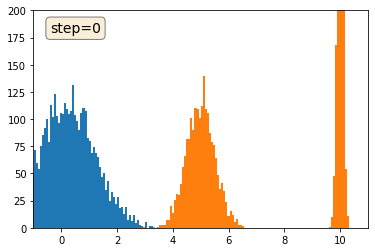

G loss:  0.50379044  D loss:  1.0727885  step:  200


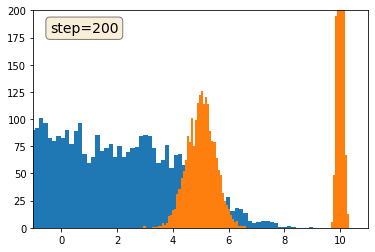

G loss:  0.6126364  D loss:  1.2832639  step:  400



KeyboardInterrupt



Error in callback <function flush_figures at 0x11d6c9160> (for post_execute):


KeyboardInterrupt: 

In [449]:
# Let's play the min-max game
def train():
    # Define the optimizers and the train operations
    optimizer = tf.keras.optimizers.Adam(1e-4)

    @tf.function
    def train_step():
        with tf.GradientTape(persistent=True) as tape:
            real_data = sample_dataset_2d()
            noise_vector = tf.random.normal(
                mean=0, stddev=1, shape=(real_data.shape[0], latent_space_shape[0])
            )
            # Sample from the Generator
            fake_data = G(noise_vector)
            # Compute the D loss
            d_fake_data = D(fake_data)
            d_real_data = D(real_data)
            d_loss_value = d_loss(generated_output=d_fake_data, real_output=d_real_data)
            # Compute the G loss
            g_loss_value = g_loss(generated_output=d_fake_data)
        # Now that we have computed the losses, we can compute the gradients 
        # (using the tape) and optimize the networks
        d_gradients = tape.gradient(d_loss_value, D.trainable_variables)
        g_gradients = tape.gradient(g_loss_value, G.trainable_variables)
        del tape

        # Apply gradients to variables
        optimizer.apply_gradients(zip(d_gradients, D.trainable_variables))
        optimizer.apply_gradients(zip(g_gradients, G.trainable_variables))
        return real_data, fake_data, g_loss_value, d_loss_value

    # 40000 training steps with logging every 200 steps
    fig, ax = plt.subplots()
    for step in range(40000):
        real_data, fake_data, g_loss_value, d_loss_value = train_step()
        if step % 200 == 0:
            print(
                "G loss: ",
                g_loss_value.numpy(),
                " D loss: ",
                d_loss_value.numpy(),
                " step: ",
                step,
            )

            # Sample 5000 values from the Generator and draw the histogram
            total_real_data = np.concatenate([real_data[:,0].numpy(),real_data[:,1].numpy()])
            total_fake_data = np.concatenate([fake_data[:,0].numpy(),fake_data[:,1].numpy()])
            
            ax.hist(total_fake_data, 100)
            ax.hist(total_real_data, 100)
            # these are matplotlib.patch.Patch properties
            props = dict(boxstyle="round", facecolor="wheat", alpha=0.5)

            # place a text box in upper left in axes coords
            textstr = f"step={step}"
            ax.text(
                0.05,
                0.95,
                textstr,
                transform=ax.transAxes,
                fontsize=14,
                verticalalignment="top",
                bbox=props,
            )

            axes = plt.gca()
            axes.set_xlim([-1, 11])
            axes.set_ylim([0, 200])
            display.display(pl.gcf())
            #display.clear_output(wait=True)
            plt.savefig("./gif/{}.png".format(step))
            plt.gca().clear()


train()

# Prueba con 3 Dimensiones

In [450]:
if not os.path.exists('./gif/'):
    os.makedirs('./gif/')

In [451]:
def get_real_dataset():
    dataset_shape = (2000, 1)
    rand_1 = tf.random.normal(
            mean=10.0, shape=dataset_shape, stddev=0.1, dtype=tf.float32
        )
    rand_2 = tf.random.normal(
            mean=5.0, shape=dataset_shape, stddev=0.5, dtype=tf.float32
        )
    rand_3 = tf.random.normal(
            mean=-4.0, shape=dataset_shape, stddev=1.5, dtype=tf.float32
        )
    return tf.concat([rand_1, rand_2, rand_3], axis=1)  


def build_generator(input_shape, output_shape=3):
    inputs = tf.keras.layers.Input(input_shape)
    net = tf.keras.layers.Dense(units=64, activation=tf.nn.elu, name='fc1')(inputs)
    net = tf.keras.layers.Dense(units=64, activation=tf.nn.elu, name='fc2')(net)
    net = tf.keras.layers.Dense(units=output_shape, name='G')(net)
    G = tf.keras.Model(inputs=inputs, outputs=net)
    return G

def build_discriminator(input_shape):
    inputs = tf.keras.layers.Input(input_shape)
    net = tf.keras.layers.Dense(units=32, activation=tf.nn.elu, name='fc1')(inputs)
    net = tf.keras.layers.Dense(units=1, name='D')(net)
    D = tf.keras.Model(inputs=inputs, outputs=net)
    return D 


def d_loss(real_output, generated_output):
    '''Discriminator Loss Function'''
    bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    d_loss = bce(tf.ones_like(real_output), real_output)\
            + bce(tf.zeros_like(generated_output), generated_output)
    return d_loss

def g_loss(generated_output):
    '''Generator Loss Function'''
    bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    g_loss = bce(tf.ones_like(generated_output), generated_output)
    return g_loss

def add_norm_distance(data):
    norm = tf.reduce_sum(tf.math.square(data), axis=1, keepdims=True) ** 0.5
    combined = tf.concat([data,norm], axis=1)
    return combined


def get_noise_data(mean, stddev, shape):
    noise_vector = tf.random.normal(mean=mean, stddev=stddev, shape=shape)
    return noise_vector

In [452]:
#@tf.function
def train_step():
    with tf.GradientTape(persistent=True) as tape:
        real_data = get_real_dataset()
        noise_vector = get_noise_data(
            mean=0, 
            stddev=1, 
            shape=(len(real_data), noise_space)
        )

        # Sample from the Generator
        fake_data = G(noise_vector)

        # Adding Norm
        real_data_norm = add_norm_distance(real_data) 
        fake_data_norm = add_norm_distance(fake_data) 

        # Compute the D loss
        d_fake_data = D(fake_data_norm)
        d_real_data = D(real_data_norm)
        d_loss_value = d_loss(generated_output=d_fake_data, real_output=d_real_data)

        # Compute the G loss
        g_loss_value = g_loss(generated_output=d_fake_data)

    # Now that we have computed the losses, we can compute the gradients 
    # (using the tape) and optimize the networks
    d_gradients = tape.gradient(d_loss_value, D.trainable_variables)
    g_gradients = tape.gradient(g_loss_value, G.trainable_variables)
    del tape

    # Apply gradients to variables
    optimizer.apply_gradients(zip(d_gradients, D.trainable_variables))
    optimizer.apply_gradients(zip(g_gradients, G.trainable_variables))

    return real_data, fake_data, g_loss_value, d_loss_value

In [453]:
input_space = 4
input_shape = (input_space,)
D = build_discriminator(input_shape)

# noise
noise_space = 100
latent_space_shape = (noise_space,)
G = build_generator(latent_space_shape)

n_epochs = 40000
optimizer = tf.keras.optimizers.Adam(1e-3)

G Loss: 0.548	D Loss: 1.009	step: 0


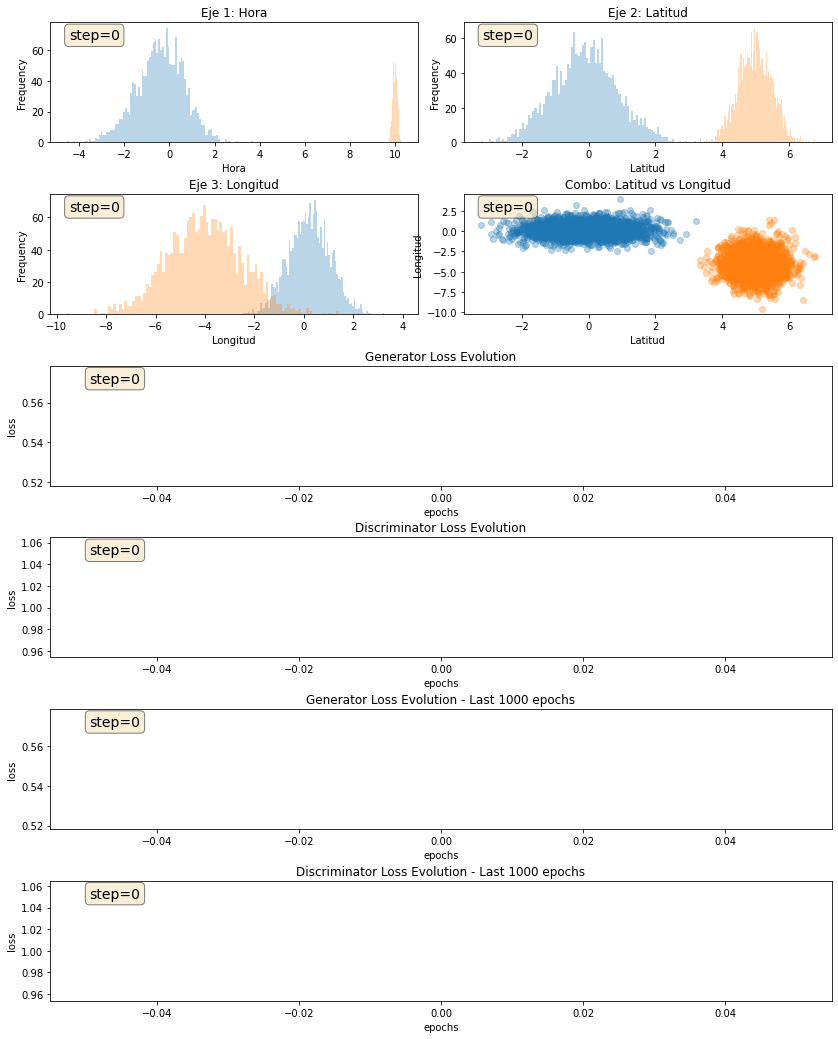


KeyboardInterrupt



Error in callback <function flush_figures at 0x11d6c9160> (for post_execute):



KeyboardInterrupt



In [ ]:
history = {'step':[], 'gloss':[], 'dloss':[]}
for step in range(n_epochs):
    real_data, fake_data, g_loss_value, d_loss_value = train_step()

    g_loss_np = g_loss_value.numpy()
    d_loss_np = d_loss_value.numpy()
    
    history['step'].append(step)
    history['gloss'].append(g_loss_np)
    history['dloss'].append(d_loss_np)
    
    if step % 200 == 0:
        dfh = pd.DataFrame(history)
        textstr = f"step={step}" 
        print(f'G Loss: {g_loss_np:.03f}\tD Loss: {d_loss_np:.03f}\tstep: {step}')

        fig = plt.figure(figsize = (14, 18))
        grid = plt.GridSpec(12, 6, wspace =0.5, hspace = 1.5, figure=fig)

        g1 = plt.subplot(grid[0:2, :3]) # Dimension 1
        g2 = plt.subplot(grid[0:2, 3:]) # Dimension 2
        g3 = plt.subplot(grid[2:4, :3]) # Dimension 3
        g4 = plt.subplot(grid[2:4, 3:]) # Dimension 2, 3
        g5 = plt.subplot(grid[4:6, :])  # G Loss
        g6 = plt.subplot(grid[6:8, :])  # D Loss
        g7 = plt.subplot(grid[8:10, :])  # G Loss Last 1000 epochs
        g8 = plt.subplot(grid[10:12, :])  # D Loss Last 1000 epochs

        # Generación de Hora
        g1.hist(fake_data[:,0].numpy(), 100, alpha=0.3)
        g1.hist(real_data[:,0].numpy(), 100, alpha=0.3)
        props = dict(boxstyle="round", facecolor="wheat", alpha=0.5)
        g1.set_title("Eje 1: Hora")
        g1.set_ylabel('Frequency')
        g1.set_xlabel('Hora')
        g1.text(0.05,0.95,textstr,transform=g1.transAxes,fontsize=14,verticalalignment="top",bbox=props,)

        # Generación de Latitud        
        g2.hist(fake_data[:,1].numpy(), 100, alpha=0.3)
        g2.hist(real_data[:,1].numpy(), 100, alpha=0.3)
        g2.set_title("Eje 2: Latitud")
        g2.set_ylabel('Frequency')
        g2.set_xlabel('Latitud')
        g2.text(0.05,0.95,textstr,transform=g2.transAxes,fontsize=14,verticalalignment="top",bbox=props,)

        # Generación de Longitud
        g3.hist(fake_data[:,2].numpy(), 100, alpha=0.3)
        g3.hist(real_data[:,2].numpy(), 100, alpha=0.3)
        g3.set_title("Eje 3: Longitud")
        g3.set_ylabel('Frequency')
        g3.set_xlabel('Longitud')
        g3.text(0.05,0.95,textstr,transform=g3.transAxes,fontsize=14,verticalalignment="top",bbox=props,)

        # Generación de Latitud vs Longitud
        g4.scatter(fake_data[:,1].numpy(), fake_data[:,2].numpy(), alpha=0.3)
        g4.scatter(real_data[:,1].numpy(), real_data[:,2].numpy(), alpha=0.3)
        g4.set_title('Combo: Latitud vs Longitud')
        g4.set_ylabel('Longitud')
        g4.set_xlabel('Latitud')
        g4.text(0.05,0.95,textstr,transform=g4.transAxes,fontsize=14,verticalalignment="top",bbox=props,)

        # Evolución del Generador
        g5.plot(history['gloss'])
        g5.set_title('Generator Loss Evolution')
        g5.set_ylabel('loss')
        g5.set_xlabel('epochs')
        g5.text(0.05,0.95,textstr,transform=g5.transAxes,fontsize=14,verticalalignment="top",bbox=props,)

        # Evolución del Discriminador
        g6.plot(history['dloss'])
        g6.set_title('Discriminator Loss Evolution')
        g6.set_ylabel('loss')
        g6.set_xlabel('epochs')
        g6.text(0.05,0.95,textstr,transform=g6.transAxes,fontsize=14,verticalalignment="top",bbox=props,)
       
        # Evolución del Generador - Last 1000 epochs
        g7.plot(dfh.tail(1000).set_index('step')['gloss'])
        g7.set_title('Generator Loss Evolution - Last 1000 epochs')
        g7.set_ylabel('loss')
        g7.set_xlabel('epochs')
        g7.text(0.05,0.95,textstr,transform=g7.transAxes,fontsize=14,verticalalignment="top",bbox=props,)

        # Evolución del Discriminador - Last 1000 epochs
        g8.plot(dfh.tail(1000).set_index('step')['dloss'])
        g8.set_title('Discriminator Loss Evolution - Last 1000 epochs')
        g8.set_ylabel('loss')
        g8.set_xlabel('epochs')
        g8.text(0.05,0.95,textstr,transform=g8.transAxes,fontsize=14,verticalalignment="top",bbox=props,)

        
        display.display(pl.gcf())
        #display.clear_output(wait=True)

        plt.savefig("./gif/{}.png".format(step))
        plt.gca().clear()

# Prueba con Data Real

In [455]:
import sys
sys.path.append('../programs/gan_utils/')

from gan_utils import (get_optimizers, 
                        get_data, 
                        get_generated_data, 
                        get_data_user_conjoined, 
                        plot_user_geodata)

In [456]:
input_space = 4
input_shape = (input_space,)
D = build_discriminator(input_shape)

# noise
noise_space = 3
latent_space_shape = (noise_space,)
G = build_generator(latent_space_shape)

n_epochs = 40000
optimizer = tf.keras.optimizers.Adam(1e-3)

In [457]:
data_user = pd.read_csv('../data/users_cl/data_user_002.csv')
data_user['hour'] = pd.to_datetime(data_user['time']).dt.hour
data_formatted = data_user[['hour','lat','lon']]

In [458]:
def get_real_dataset(n_sample=5000):
    data_sample = data_formatted.sample(5000)
    data_sample = tf.convert_to_tensor(data_sample, dtype=tf.float32)
    return data_sample

In [459]:
def get_noise_data_3d(real_data, shape):    
    min_1, min_2, min_3 = real_data.numpy().min(axis=0)
    max_1, max_2, max_3 = real_data.numpy().max(axis=0)
    
    n = shape[0] // 3
    n3 = shape[0] - 2 * n
    noise1 = tf.random.uniform(shape=(n,100), minval=min_1, maxval=max_1)
    noise2 = tf.random.uniform(shape=(n,100), minval=min_2, maxval=max_2)
    noise3 = tf.random.uniform(shape=(n3,100), minval=min_3, maxval=max_3)
    noise_vector = tf.concat([noise1, noise2, noise3], axis=0)
    return noise_vector

- REAL SHAPE (2000, 3)

- NOISE  (ANY) 1D

- GENERADOR

- OUTPUT GENERADOR  (2000, 3)

- DISCRIMINADOR

- OUTPUT DISCRIMINADOR  (2000, 1)

In [460]:
"""
def get_noise_data_3d(real_data, shape):    
    min_1, min_2, min_3 = real_data.numpy().min(axis=0)
    max_1, max_2, max_3 = real_data.numpy().max(axis=0)
    
    n = shape[0] // 3
    n3 = shape[0] - 2 * n
    noise1 = tf.random.uniform(shape=(n,100), minval=min_1, maxval=max_1)
    noise2 = tf.random.uniform(shape=(n,100), minval=min_2, maxval=max_2)
    noise3 = tf.random.uniform(shape=(n3,100), minval=min_3, maxval=max_3)
    noise_vector = tf.concat([noise1, noise2, noise3], axis=0)
    return noise_vector
"""

'\ndef get_noise_data_3d(real_data, shape):    \n    min_1, min_2, min_3 = real_data.numpy().min(axis=0)\n    max_1, max_2, max_3 = real_data.numpy().max(axis=0)\n    \n    n = shape[0] // 3\n    n3 = shape[0] - 2 * n\n    noise1 = tf.random.uniform(shape=(n,100), minval=min_1, maxval=max_1)\n    noise2 = tf.random.uniform(shape=(n,100), minval=min_2, maxval=max_2)\n    noise3 = tf.random.uniform(shape=(n3,100), minval=min_3, maxval=max_3)\n    noise_vector = tf.concat([noise1, noise2, noise3], axis=0)\n    return noise_vector\n'

In [461]:
def get_noise_data_3d(real_data):    
    min_1, min_2, min_3 = real_data.numpy().min(axis=0)
    max_1, max_2, max_3 = real_data.numpy().max(axis=0)
    
    noise1 = tf.random.uniform(shape=(len(real_data),1), minval=min_1, maxval=max_1)
    noise2 = tf.random.uniform(shape=(len(real_data),1), minval=min_2, maxval=max_2)
    noise3 = tf.random.uniform(shape=(len(real_data),1), minval=min_3, maxval=max_3)
    noise_vector = tf.concat([noise1, noise2, noise3], axis=1)
    return noise_vector

In [462]:
#@tf.function
def train_step():
    with tf.GradientTape(persistent=True) as tape:
        real_data = get_real_dataset()
        #noise_vector = get_noise_data(
        #    mean=0, 
        #    stddev=1, 
        #    shape=(len(real_data), noise_space)
        #)
        #noise_vector = get_noise_data_3d(
        #    real_data, 
        #    shape=(len(real_data), noise_space)
        #)
        noise_vector = get_noise_data_3d(real_data)

        # Sample from the Generator
        fake_data = G(noise_vector)

        # Adding Norm
        real_data_norm = add_norm_distance(real_data) 
        fake_data_norm = add_norm_distance(fake_data) 

        # Compute the D loss
        d_fake_data = D(fake_data_norm)
        d_real_data = D(real_data_norm)
        d_loss_value = d_loss(generated_output=d_fake_data, real_output=d_real_data)

        # Compute the G loss
        g_loss_value = g_loss(generated_output=d_fake_data)

    # Now that we have computed the losses, we can compute the gradients 
    # (using the tape) and optimize the networks
    d_gradients = tape.gradient(d_loss_value, D.trainable_variables)
    g_gradients = tape.gradient(g_loss_value, G.trainable_variables)
    del tape

    # Apply gradients to variables
    optimizer.apply_gradients(zip(d_gradients, D.trainable_variables))
    optimizer.apply_gradients(zip(g_gradients, G.trainable_variables))

    return real_data, fake_data, g_loss_value, d_loss_value

In [463]:
history = {'step':[], 'gloss':[], 'dloss':[]}
for step in range(n_epochs):
    real_data, fake_data, g_loss_value, d_loss_value = train_step()

    g_loss_np = g_loss_value.numpy()
    d_loss_np = d_loss_value.numpy()
    
    history['step'].append(step)
    history['gloss'].append(g_loss_np)
    history['dloss'].append(d_loss_np)
    
    if step % 200 == 0:
        dfh = pd.DataFrame(history)
        textstr = f"step={step}" 
        print(f'G Loss: {g_loss_np:.03f}\tD Loss: {d_loss_np:.03f}\tstep: {step}')

        fig = plt.figure(figsize = (14, 18))
        grid = plt.GridSpec(12, 6, wspace =0.5, hspace = 1.5, figure=fig)

        g1 = plt.subplot(grid[0:2, :3]) # Dimension 1
        g2 = plt.subplot(grid[0:2, 3:]) # Dimension 2
        g3 = plt.subplot(grid[2:4, :3]) # Dimension 3
        g4 = plt.subplot(grid[2:4, 3:]) # Dimension 2, 3
        g5 = plt.subplot(grid[4:6, :])  # G Loss
        g6 = plt.subplot(grid[6:8, :])  # D Loss
        g7 = plt.subplot(grid[8:10, :])  # G Loss Last 1000 epochs
        g8 = plt.subplot(grid[10:12, :])  # D Loss Last 1000 epochs

        # Generación de Hora
        g1.hist(fake_data[:,0].numpy(), 100, alpha=0.3)
        g1.hist(real_data[:,0].numpy(), 100, alpha=0.3)
        props = dict(boxstyle="round", facecolor="wheat", alpha=0.5)
        g1.set_title("Eje 1: Hora")
        g1.set_ylabel('Frequency')
        g1.set_xlabel('Hora')
        g1.text(0.05,0.95,textstr,transform=g1.transAxes,fontsize=14,verticalalignment="top",bbox=props,)

        # Generación de Latitud        
        g2.hist(fake_data[:,1].numpy(), 100, alpha=0.3)
        g2.hist(real_data[:,1].numpy(), 100, alpha=0.3)
        g2.set_title("Eje 2: Latitud")
        g2.set_ylabel('Frequency')
        g2.set_xlabel('Latitud')
        g2.text(0.05,0.95,textstr,transform=g2.transAxes,fontsize=14,verticalalignment="top",bbox=props,)

        # Generación de Longitud
        g3.hist(fake_data[:,2].numpy(), 100, alpha=0.3)
        g3.hist(real_data[:,2].numpy(), 100, alpha=0.3)
        g3.set_title("Eje 3: Longitud")
        g3.set_ylabel('Frequency')
        g3.set_xlabel('Longitud')
        g3.text(0.05,0.95,textstr,transform=g3.transAxes,fontsize=14,verticalalignment="top",bbox=props,)

        # Generación de Latitud vs Longitud
        g4.scatter(fake_data[:,1].numpy(), fake_data[:,2].numpy(), alpha=0.3)
        g4.scatter(real_data[:,1].numpy(), real_data[:,2].numpy(), alpha=0.3)
        g4.set_title('Combo: Latitud vs Longitud')
        g4.set_ylabel('Longitud')
        g4.set_xlabel('Latitud')
        g4.text(0.05,0.95,textstr,transform=g4.transAxes,fontsize=14,verticalalignment="top",bbox=props,)

        # Evolución del Generador
        g5.plot(history['gloss'])
        g5.set_title('Generator Loss Evolution')
        g5.set_ylabel('loss')
        g5.set_xlabel('epochs')
        g5.text(0.05,0.95,textstr,transform=g5.transAxes,fontsize=14,verticalalignment="top",bbox=props,)

        # Evolución del Discriminador
        g6.plot(history['dloss'])
        g6.set_title('Discriminator Loss Evolution')
        g6.set_ylabel('loss')
        g6.set_xlabel('epochs')
        g6.text(0.05,0.95,textstr,transform=g6.transAxes,fontsize=14,verticalalignment="top",bbox=props,)
       
        # Evolución del Generador - Last 1000 epochs
        g7.plot(dfh.tail(1000).set_index('step')['gloss'])
        g7.set_title('Generator Loss Evolution - Last 1000 epochs')
        g7.set_ylabel('loss')
        g7.set_xlabel('epochs')
        g7.text(0.05,0.95,textstr,transform=g7.transAxes,fontsize=14,verticalalignment="top",bbox=props,)

        # Evolución del Discriminador - Last 1000 epochs
        g8.plot(dfh.tail(1000).set_index('step')['dloss'])
        g8.set_title('Discriminator Loss Evolution - Last 1000 epochs')
        g8.set_ylabel('loss')
        g8.set_xlabel('epochs')
        g8.text(0.05,0.95,textstr,transform=g8.transAxes,fontsize=14,verticalalignment="top",bbox=props,)

        
        display.display(pl.gcf())
        #display.clear_output(wait=True)

        plt.savefig("./gif/{}.png".format(step))
        plt.gca().clear()

G Loss: 0.926	D Loss: 0.506	step: 0



KeyboardInterrupt



Error in callback <function flush_figures at 0x11d6c9160> (for post_execute):



KeyboardInterrupt

